# CNN and Computer Vision
## Part 3

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt

import pathlib
import glob
import cv2
import PIL

import keras
from keras.preprocessing import image

In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


### Importing car images

In [ ]:
cars_folder='drive/My Drive/Projects/Computer Vision/Cars Images'

### Visualizing and Analyzing data

In [ ]:
img_col = []

data_dir_cars = pathlib.Path(cars_folder)

folder_cars = list(data_dir_cars.glob('*'))
images_cars = list(data_dir_cars.glob('*.png')) #list of all images (full path)

print('Path of Cars images:')
for f in folder_cars:
    print(f)

    img_col.append(os.path.basename(f))
    # print(os.path.basename(f))

print('\nNumber of images: ', len(folder_cars))
# print(img_col[:])

Path of Cars images:
drive/My Drive/Projects/Computer Vision/Cars Images/00008.jpg
drive/My Drive/Projects/Computer Vision/Cars Images/00012.jpg
drive/My Drive/Projects/Computer Vision/Cars Images/00013.jpg
drive/My Drive/Projects/Computer Vision/Cars Images/00007.jpg
drive/My Drive/Projects/Computer Vision/Cars Images/00006.jpg
drive/My Drive/Projects/Computer Vision/Cars Images/00003.jpg
drive/My Drive/Projects/Computer Vision/Cars Images/00014.jpg
drive/My Drive/Projects/Computer Vision/Cars Images/00002.jpg
drive/My Drive/Projects/Computer Vision/Cars Images/00011.jpg
drive/My Drive/Projects/Computer Vision/Cars Images/00010.jpg
drive/My Drive/Projects/Computer Vision/Cars Images/00015.jpg
drive/My Drive/Projects/Computer Vision/Cars Images/00005.jpg
drive/My Drive/Projects/Computer Vision/Cars Images/00009.jpg
drive/My Drive/Projects/Computer Vision/Cars Images/00001.jpg
drive/My Drive/Projects/Computer Vision/Cars Images/00004.jpg

Number of images:  15


In [ ]:
project_path = 'drive/My Drive/Projects/Computer Vision/'  #change dir to your project folder
dataset_file = project_path + 'Cars labels.xlsx'

In [ ]:
data = pd.read_excel(dataset_file)
data

,Image,Color,Make,Country
0,00001.jpg,White,Audi,Germany
1,00002.jpg,Black,Acura,Japan
2,00003.jpg,Red,Dodge,USA
3,00004.jpg,Red,Hyundai,South Korea
4,00005.jpg,White,Ford,USA
5,00006.jpg,Red,Unknown,Unknown
6,00007.jpg,Blue,Dodge,USA
7,00008.jpg,Red,Dodge,USA
8,00009.jpg,Gray,Mitsubishi,Japan
9,00010.jpg,Silver,Chevrolet,USA


### Displaying cars against their labels

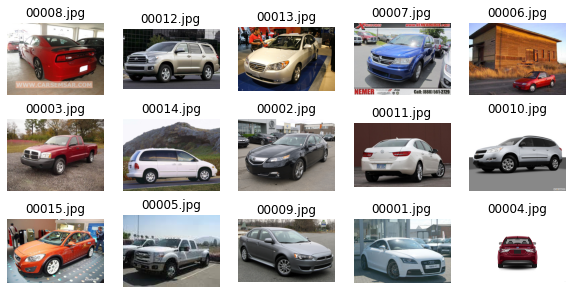

In [ ]:
fig = plt.figure(figsize=(10, 5))
for i in range(15):
    print
    plt.subplot(3, 5, i + 1)
    plt.title(str(folder_cars[i]).split('/')[-1], fontsize=12) #get the file name and display as title
    plt.imshow(PIL.Image.open(folder_cars[i]))
    ax = plt.axis("off")

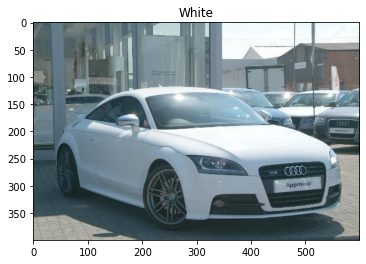

In [ ]:
filenames = glob.glob("drive/My Drive/Projects/Computer Vision/Cars Images/*.jpg")
filenames.sort()
images = [cv2.imread(img) for img in filenames]

plt.figure(figsize= (20,5));

plt.title(data.Color[0])
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB));

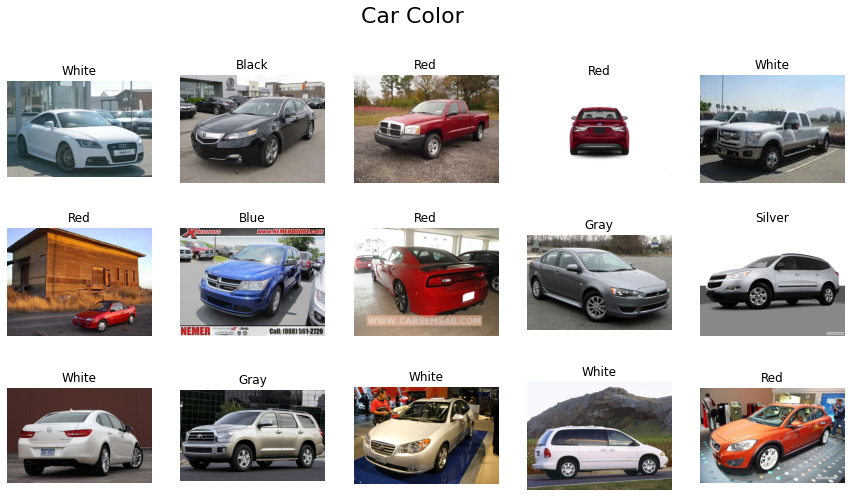

In [ ]:
#Plot images of cars along with their respective colors
plt.figure(figsize=[15,8])

for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB));
    plt.title(data.Color[i])
    plt.axis('off')

# plt.subplots_adjust(hspace=0.1)
plt.suptitle('Car Color', fontsize= 22)
plt.show()

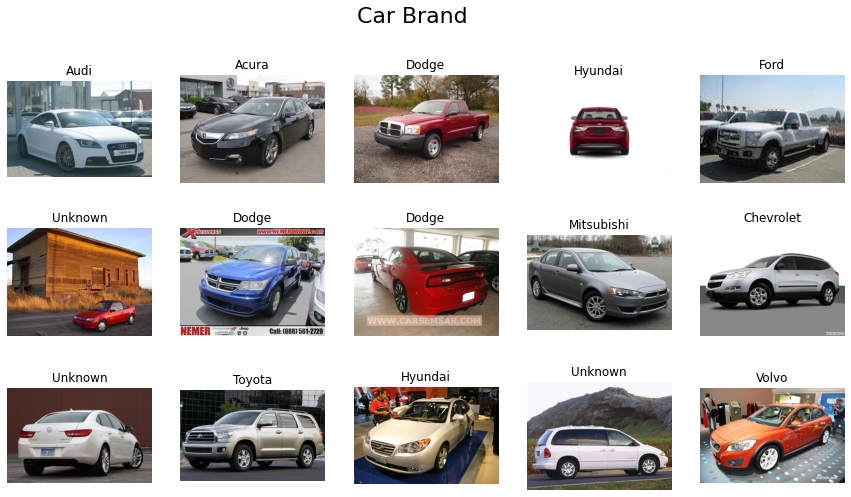

In [ ]:
#Plot images of cars along with their respective brand
plt.figure(figsize=[15,8])

for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB));
    plt.title(data.Make[i])
    plt.axis('off')

# plt.subplots_adjust(hspace=0.1)
plt.suptitle('Car Brand', fontsize= 22)
plt.show()

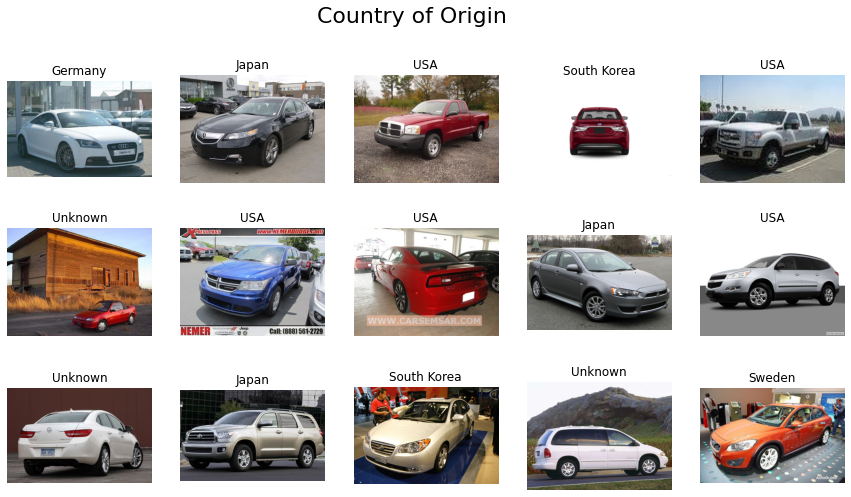

In [ ]:
#Plot images of cars along with their respective country of origin
plt.figure(figsize=[15,8])

for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB));
    plt.title(data.Country[i])
    plt.axis('off')

# plt.subplots_adjust(hspace=0.1)
plt.suptitle('Country of Origin', fontsize= 22)
plt.show()

- We can observe there are no names for the cars in few images. This would cause problems while analysing data.
- There are no logos of cars in few images and thus we cannot identify the model and car brand.
- There is a lot of difference in the car viewing point as not all the cars are facing in the same direction.